AS (将来)が最大値を取るindex 859
その最大値 24.170000305175783
AS (現在)が最大値を取るindex 2367
その最大値 24.140000305175782
KF (将来)が最大値を取るindex 1078
その最大値 24.170000305175783
KF (現在)が最大値を取るindex 2367
その最大値 24.140000305175782
YS (将来)が最大値を取るindex 1394
その最大値 24.170000305175783
YS (現在)が最大値を取るindex 2367
その最大値 24.140000305175782


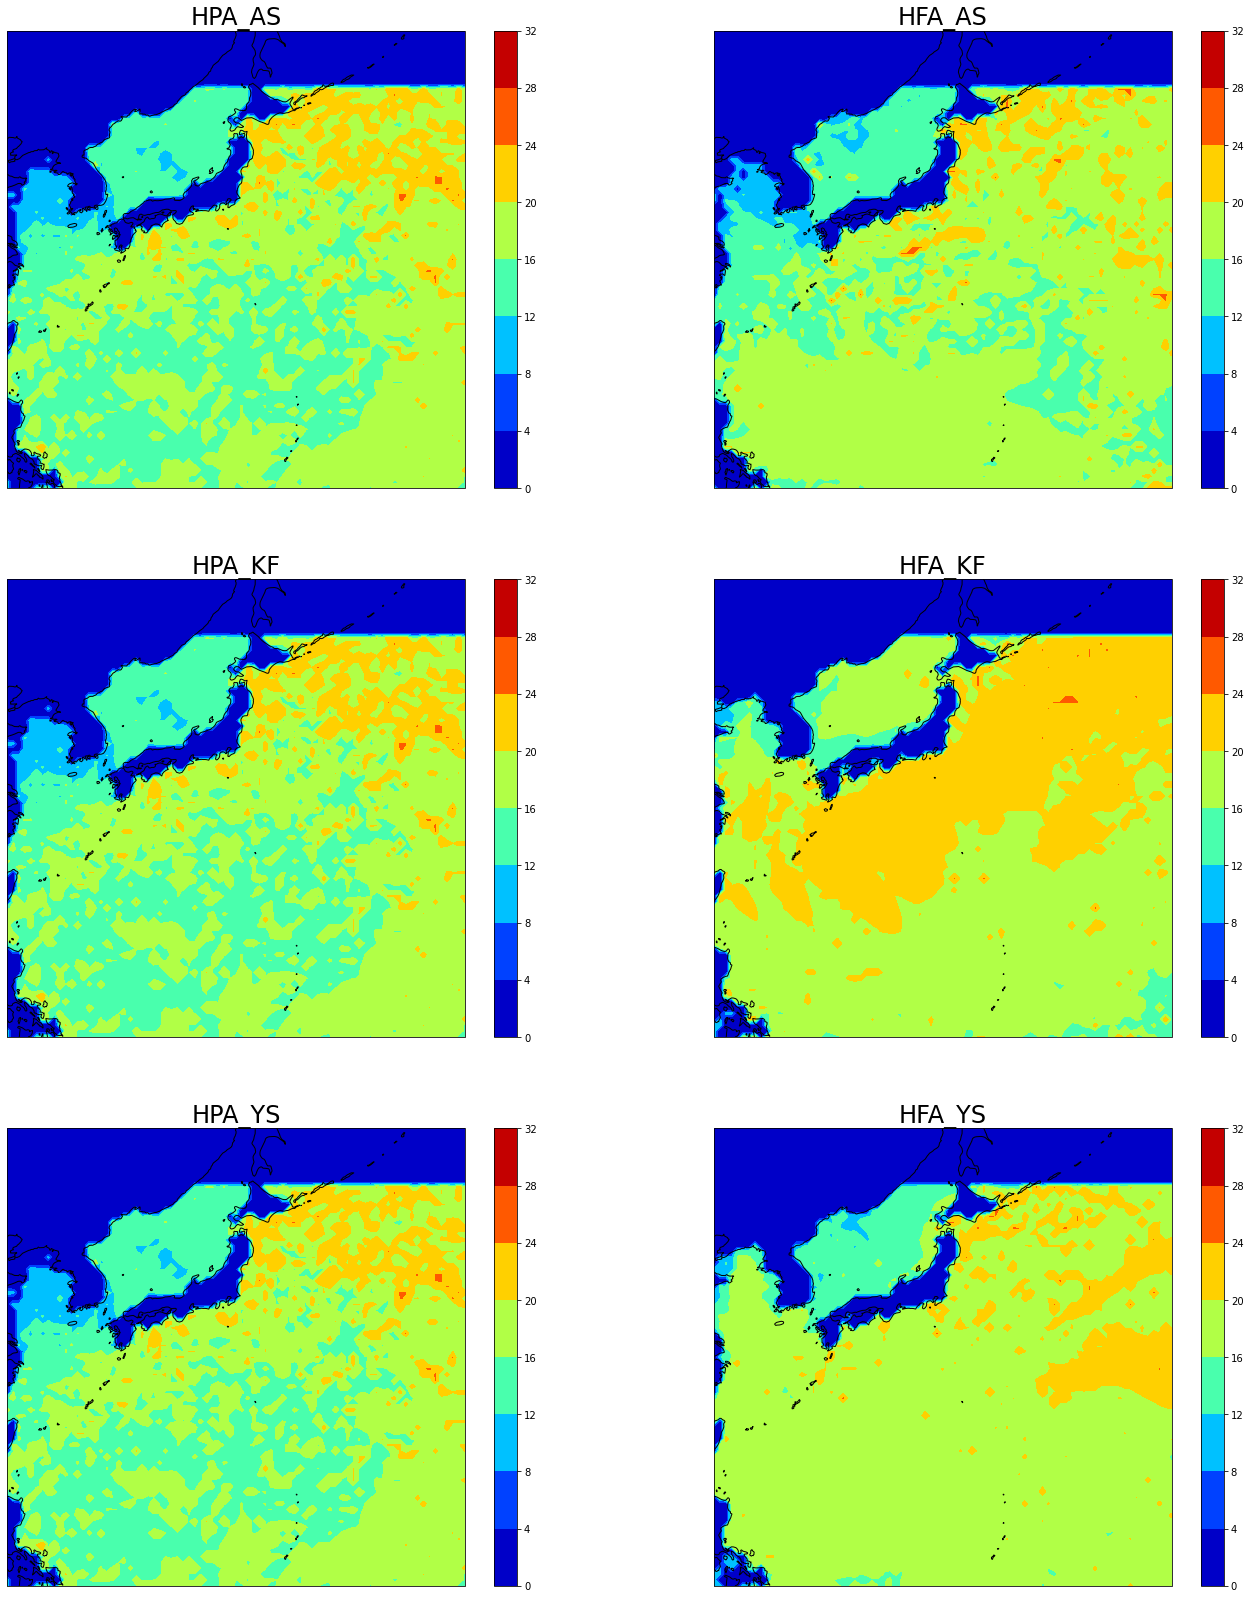

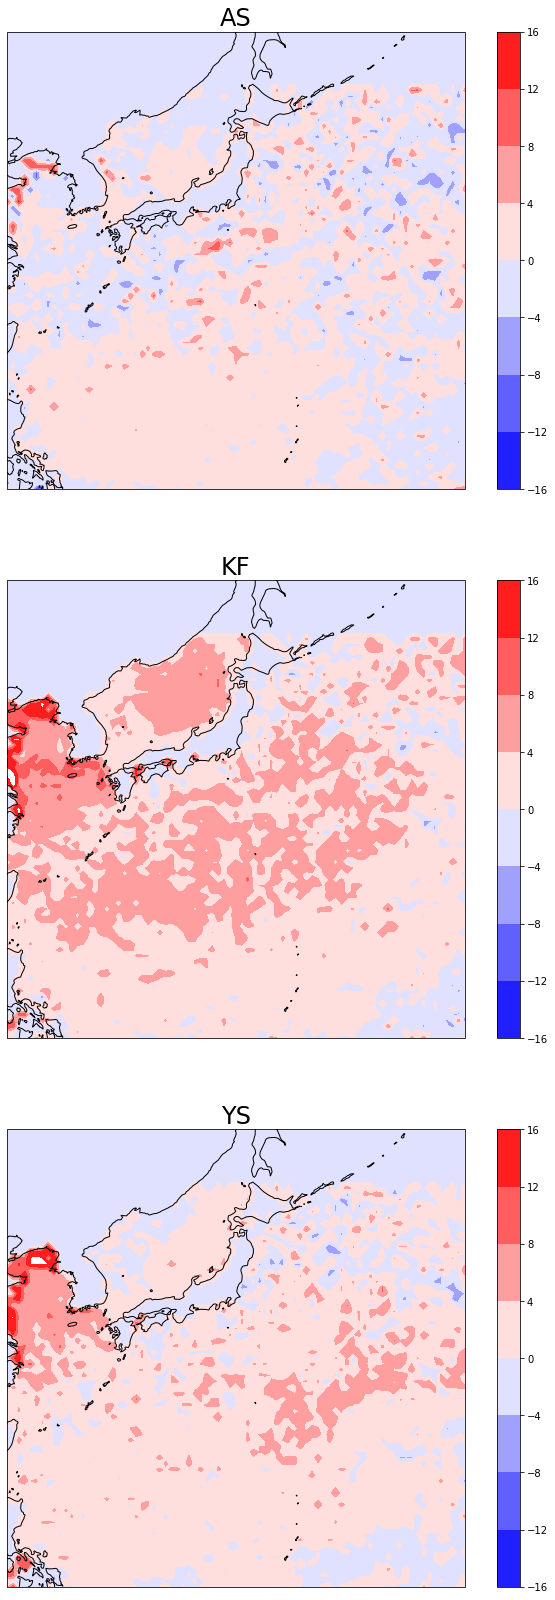

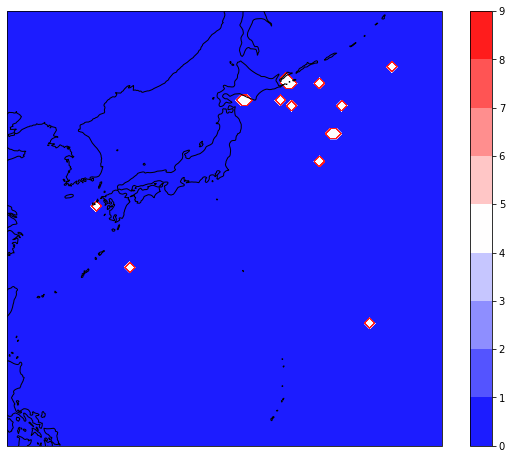

In [29]:
from csv import reader
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs


"""モデル間の最大値比較の図を出力"""

MODEL = ['AS', 'KF', 'YS']

with open('../lats.csv', 'r') as csv_file:
    csv_reader = reader(csv_file)
    lats = list(csv_reader)
with open('../lons.csv', 'r') as csv_file:
    csv_reader = reader(csv_file)
    lons = list(csv_reader)

for i in range(79):
    for j in range(79):
        lats[i][j] = float(lats[i][j])
        lons[i][j] = float(lons[i][j])

lat_s = lats[0][0]
lat_n = lats[0][-1]
lon_w = lons[0][0]
lon_e = lons[-1][0]

DATA_F = []
DATA_P = []

LOCATION = []

for i in range(len(MODEL)):
    # モデル名
    model = MODEL[i]
    # 各地点の最大値
    data_f = np.zeros((79, 79))  # 未来
    data_p = np.zeros((79, 79))  # 過去

    # 将来
    with open('../pot_csv/' + 'HFA_' + model + '_c0_POT_DATA.csv', 'r') as csv_file:
        csv_reader = reader(csv_file)
        POT_ALL = list(csv_reader)
        for index in range(79 * 10, 79 * 79):
            POT = POT_ALL[index]
            s = [float(val) for val in POT]
            if len(s) > 1:
                data_f[index // 79][index % 79] = max(s)
            else:
                data_f[index // 79][index % 79] = 0
    # 過去
    with open('../pot_csv/' + 'HPA_' + model + '_POT_DATA.csv', 'r') as csv_file:
        csv_reader = reader(csv_file)
        POT_ALL = list(csv_reader)
        for index in range(79 * 10, 79 * 79):
            POT = POT_ALL[index]
            s = [float(val) for val in POT]
            if len(s) > 1:
                data_p[index // 79][index % 79] = max(s)
            else:
                data_p[index // 79][index % 79] = 0
    
    print(model, '(将来)が最大値を取るindex', np.argmax(data_f))
    print('その最大値', np.max(data_f))
    print(model, '(現在)が最大値を取るindex', np.argmax(data_p))
    print('その最大値', np.max(data_p))
    DATA_F.append(data_f)
    DATA_P.append(data_p)
    idx = np.where(data_f >= 24.170000305175783)
    for i in range(len(idx[0])):
        LOCATION.append(79 * idx[0][i] + idx[1][i])

# 描画(現在気候の最大値)
fig = plt.figure(figsize=(20, 24))
levels = np.arange(0, 33, 4)
ax1 = fig.add_subplot(3, 2, 1, projection=ccrs.PlateCarree())
a = plt.contourf(lons, lats, DATA_P[0], levels=levels, transform=ccrs.PlateCarree(), cmap='jet')
c_bar = plt.colorbar(a)
ax1.coastlines()
ax1.set_title('HPA_' + MODEL[0], fontsize=24)

ax2 = fig.add_subplot(3, 2, 3, projection=ccrs.PlateCarree()) 
a = plt.contourf(lons, lats, DATA_P[1], levels=levels, transform=ccrs.PlateCarree(), cmap='jet')
c_bar = plt.colorbar(a)
ax2.coastlines()
ax2.set_title('HPA_' + MODEL[1], fontsize=24)

ax3 = fig.add_subplot(3, 2, 5, projection=ccrs.PlateCarree()) 
a = plt.contourf(lons, lats, DATA_P[2], levels=levels, transform=ccrs.PlateCarree(), cmap='jet')
c_bar = plt.colorbar(a)
ax3.coastlines()
ax3.set_title('HPA_' + MODEL[2], fontsize=24)

# 描画(将来気候の最大値)
ax4 = fig.add_subplot(3, 2, 2, projection=ccrs.PlateCarree())
a = plt.contourf(lons, lats, DATA_F[0], levels=levels, transform=ccrs.PlateCarree(), cmap='jet')
c_bar = plt.colorbar(a)
ax4.coastlines()
ax4.set_title('HFA_' + MODEL[0], fontsize=24)

ax5 = fig.add_subplot(3, 2, 4, projection=ccrs.PlateCarree()) 
a = plt.contourf(lons, lats, DATA_F[1], levels=levels, transform=ccrs.PlateCarree(), cmap='jet')
c_bar = plt.colorbar(a)
ax5.coastlines()
ax5.set_title('HFA_' + MODEL[1], fontsize=24)

ax6 = fig.add_subplot(3, 2, 6, projection=ccrs.PlateCarree()) 
a = plt.contourf(lons, lats, DATA_F[2], levels=levels, transform=ccrs.PlateCarree(), cmap='jet')
c_bar = plt.colorbar(a)
ax6.coastlines()
ax6.set_title('HFA_' + MODEL[2], fontsize=24)
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95)
plt.savefig("../img/現在気候と将来気候の最大波高.png")
plt.show()

# 描画(将来気候と現在気候の最大波高の差)
fig = plt.figure(figsize=(10, 24))
levels = np.arange(-16, 17, 4)
ax1 = fig.add_subplot(3, 1, 1, projection=ccrs.PlateCarree())
a = plt.contourf(lons, lats, DATA_F[0] - DATA_P[0], levels=levels, transform=ccrs.PlateCarree(), cmap='bwr')
c_bar = plt.colorbar(a)
ax1.coastlines()
ax1.set_title(MODEL[0], fontsize=24)

ax2 = fig.add_subplot(3, 1, 2, projection=ccrs.PlateCarree()) 
a = plt.contourf(lons, lats, DATA_F[1] - DATA_P[1], levels=levels, transform=ccrs.PlateCarree(), cmap='bwr')
c_bar = plt.colorbar(a)
ax2.coastlines()
ax2.set_title(MODEL[1], fontsize=24)

ax3 = fig.add_subplot(3, 1, 3, projection=ccrs.PlateCarree()) 
a = plt.contourf(lons, lats, DATA_F[2] - DATA_P[2], levels=levels, transform=ccrs.PlateCarree(), cmap='bwr')
c_bar = plt.colorbar(a)
ax3.coastlines()
ax3.set_title(MODEL[2], fontsize=24)
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95)
plt.savefig("../img/最大波高の変化.png")
plt.show()


# 描画(将来気候と現在気候の最大波高の差)
fig = plt.figure(figsize=(10, 8))
levels = np.arange(0, 10, 1)
plot = np.zeros((79, 79))
for idx in LOCATION:
    plot[idx // 79][idx % 79] = 100
ax1 = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
a = plt.contourf(lons, lats, plot, levels=levels, transform=ccrs.PlateCarree(), cmap='bwr')
c_bar = plt.colorbar(a)
ax1.coastlines()